# World Emissions Data Analysis

### A look at emissions of Germany, UK & US during WW2; India's liberalization to tech boom age and a comparison of China & US since 1980

This project looks at Pollution Emissions during the following time periods:
<dd>1. 1920 - 1955 for Germany, UK & US</dd>

<dd>2. 1980 - 2017 for India</dd>

<dd>3. 1970 - 2050 for China & US</dd>


The data source is the CO2 and GHG Emission Data from Kaggle.com located at the link: <br>https://www.kaggle.com/datasets/srikantsahu/co2-and-ghg-emission-data
<br><br>
At the time of download this dataset contains emission data of Green House Gases (in tonnes) of different countries from year 1751 through to 2017

### Table of Contents

**Part 1**: 1920 - 1955 for Germany, UK & US
- 1920 - 1955 Emissions at a glance  
- Part 1a. Pre-Great Depression (1920-1929) 
- Part 1b. Great Depression (1929-1939)  
- Part 1c. World War II (1939-1945)
- Part 1d. Post-World War II (1945-1955)
- Part 1e. Emissions Growth Rate per Period by Country

**Part 2**: 1980 - 2017 for India

**Part 3**: 1980 - 2017 historical; 2017 - 2047 forecast for China & USA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.api import Holt


filename = "emission data.csv"
emission_df = pd.read_csv(filename, index_col=0)

# Functions

In [2]:
# converting index to DateTime object
def convert_index(emission_data):
    emission_data.index = pd.to_datetime(emission_data.index)
    return emission_data

In [3]:
# get data to plot
def plot_emissions(country, start_year = '1751', end_year = '2017'):
    emissions_data = emission_df.loc[country, start_year:end_year]
    return convert_index(emissions_data)

In [4]:
# calculate the rate of growth and return value as %
def calculate_growth_percent(country, year1, year2):
    growth_percent = ((emission_df.loc[country, year2] - emission_df.loc[country, year1])/emission_df.loc[country, year1])*100
    return growth_percent.round(1)

In [5]:
# Gathering data for last 41 years to forecast emissions
def country_to_forecast(country):
    country_data = emission_df.loc[country].tail(41)
    return convert_index(country_data)


In [6]:
# calculate and return forecasted data
def get_historical_data(country_fcast):
    country_hist_data = country_to_forecast(country_fcast)
    return country_hist_data

In [7]:
def get_fitted_data(historical_data):
    country_fitted_data = Holt(historical_data).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
    return country_fitted_data

In [8]:
def get_forecast_data(fitted_data):
    country_fcast_data = fitted_data.forecast(30)
    return country_fcast_data

In [9]:
def create_country_growth_df(country_list):
    df = pd.DataFrame(columns=['country'])
    df['country'] = country_list
    df['pre-Great Depression'] = df['country'].apply(lambda x: int(round(calculate_growth_percent(x, '1920', '1929'))))
    df['Great Depression'] = df['country'].apply(lambda x: int(round(calculate_growth_percent(x, '1929', '1939'))))
    df['World War II'] = df['country'].apply(lambda x: int(round(calculate_growth_percent(x, '1939', '1945'))))
    df['post-World War II'] = df['country'].apply(lambda x: int(round(calculate_growth_percent(x, '1945', '1955'))))
    
    return df

<br><br>
## Part 1: 1920 - 1955 for Germany, UK & US

Examining the emissions of the United States, United Kingdom and Germany from 1920 to 1955.<br>This covers the following four time periods:<br>
Part 1a. Pre-Great Depression (1920-1929)<br>
Part 1b. Great Depression (1929-1939)<br>
Part 1c. World War II (1939-1945)<br>
Part 1d. Post-World War II (1945-1955)<br>

From the 1920s through to 1955 the world experienced recovery from Word War I, the Great Depression,  Word War II and the beginning of the recovery from World War II. Looking at how the three nations navigated these times, I am interested in learning what primary source of energy was used to generate these emissions, what changes led to the demand in energy and is there a pattern for each nation's emission growth?

### 1920 - 1955 Emissions at a glance

The chart below shows the emissions of Germany, UK and US from 1920 to 1955.

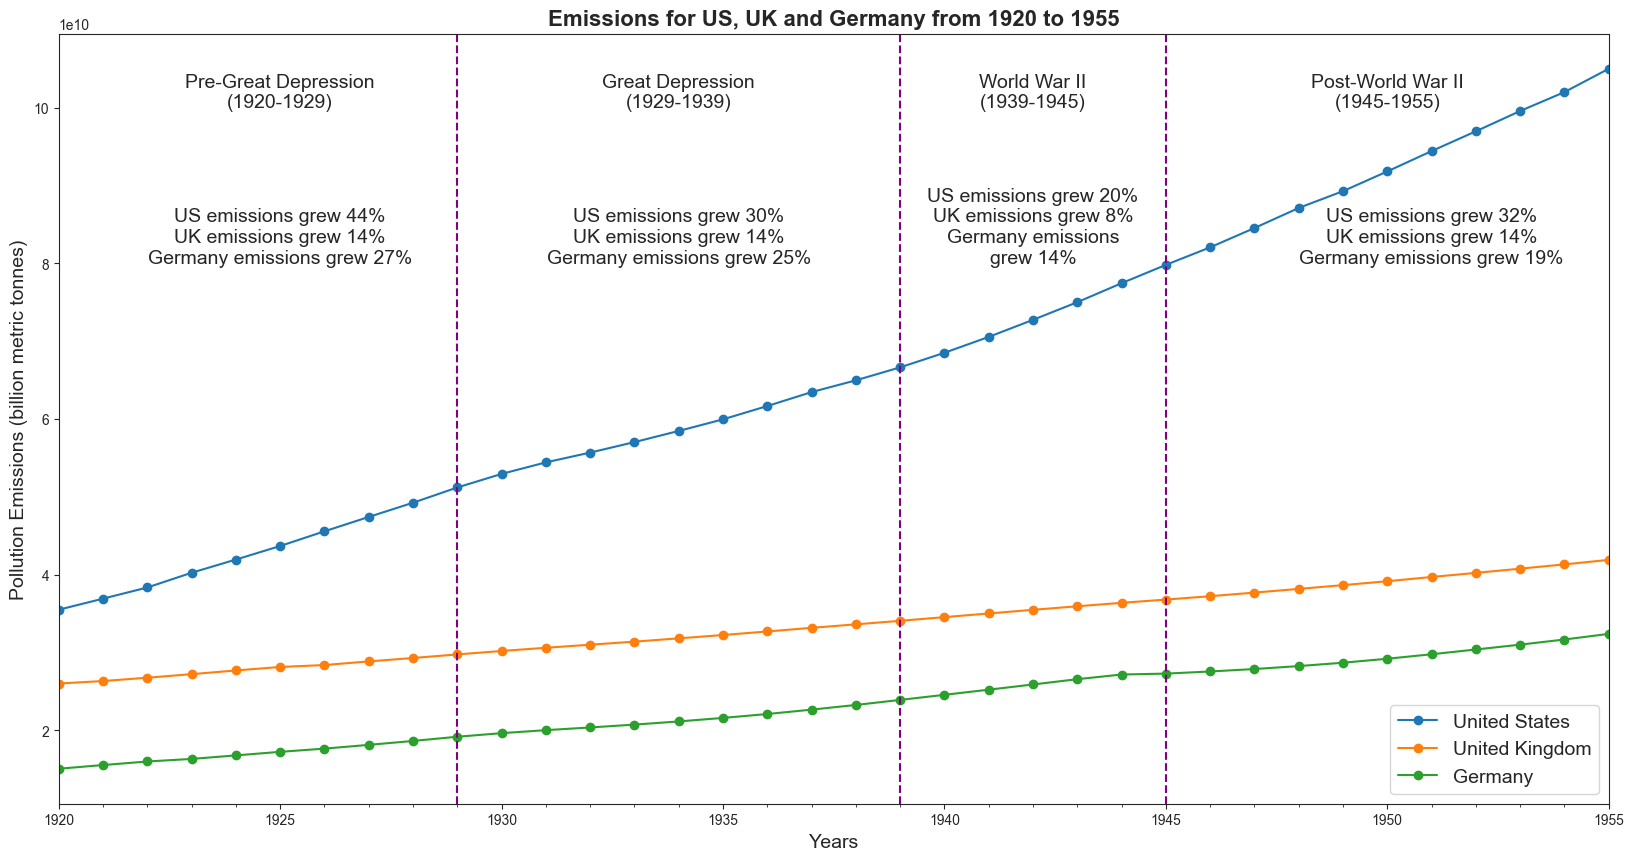

In [10]:
country_list = ['United States','United Kingdom', 'Germany']

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
sns.set_style("ticks")
beginning_year = '1920'
end_year = '1955'
ax = plt.gca()

for country in country_list:
    plot_emissions(country, beginning_year, end_year).plot(ax = ax, marker='o')

plt.ylabel('Pollution Emissions (billion metric tonnes)', fontsize=14)
plt.ticklabel_format(axis='y', style='sci', scilimits=(10,10))
plt.xlabel('Years', fontsize=14)
plt.title("Emissions for US, UK and Germany from 1920 to 1955", fontsize=16, fontweight='bold')
plt.axvline('1929', color='purple', linestyle = '--')
plt.text('1925', 100000000000, "Pre-Great Depression\n(1920-1929)", fontsize=14, horizontalalignment='center')
plt.axvline('1939', color='purple', linestyle = '--')
plt.text('1934', 100000000000, "Great Depression\n(1929-1939)", fontsize=14, horizontalalignment='center')
plt.axvline('1945', color='purple', linestyle = '--')
plt.text('1942', 100000000000, "World War II\n(1939-1945)", fontsize=14, horizontalalignment='center')
#plt.axvline('1950', color='purple', linestyle = '--')
plt.text('1950', 100000000000, "Post-World War II\n(1945-1955)", fontsize=14, horizontalalignment='center')
plt.text('1925', 80000000000, "US emissions grew 44%\nUK emissions grew 14%\nGermany emissions grew 27%", \
         fontsize=14, horizontalalignment='center')
plt.text('1934', 80000000000, "US emissions grew 30%\nUK emissions grew 14%\nGermany emissions grew 25%", \
         fontsize=14, horizontalalignment='center')
plt.text('1942', 80000000000, "US emissions grew 20%\nUK emissions grew 8%\nGermany emissions\ngrew 14%", \
         fontsize=14, horizontalalignment='center')
plt.text('1951', 80000000000, "US emissions grew 32%\nUK emissions grew 14%\nGermany emissions grew 19%", \
         fontsize=14, horizontalalignment='center')
ax.legend(loc='lower right', facecolor='white', fontsize=14)
plt.show()

<br>
<br>

<br><br>
Let us now look at each time period to understand what events were taking place that may have had some impact on the emission levels.<br>

### Part 1a. Pre-Great Depression (1920-1929)

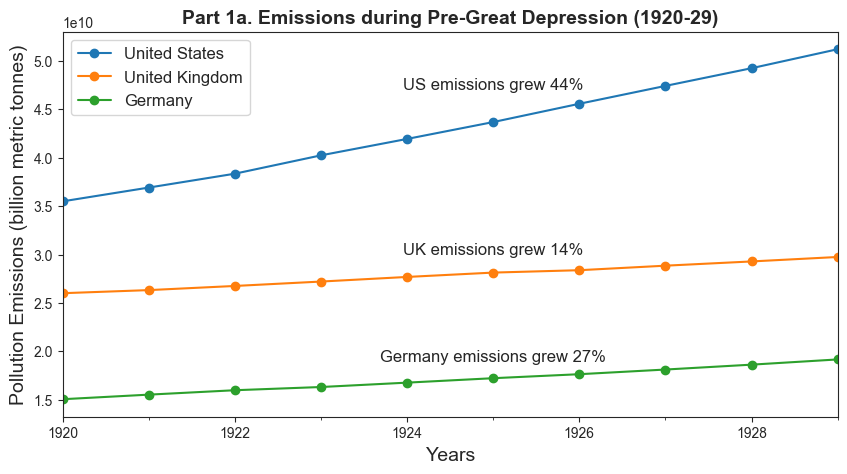

In [11]:
country_list = ['United States','United Kingdom', 'Germany']

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)
sns.set_style("ticks")
beginning_year = '1920'
end_year = '1929'
ax = plt.gca()

d_country_emission_growth = {} # calculate the emissions growth for each country
for country in country_list:
    plot_emissions(country, beginning_year, end_year).plot(ax = ax, marker='o')
    d_country_emission_growth[country] = int(round(calculate_growth_percent(country, beginning_year, end_year)))

plt.ylabel('Pollution Emissions (billion metric tonnes)', fontsize=14)
plt.ticklabel_format(axis='y', style='sci', scilimits=(10,10))
plt.xlabel('Years', fontsize=14)
plt.title("Part 1a. Emissions during Pre-Great Depression (1920-29)", fontsize=14, fontweight='bold')
plt.text('1925', 47000000000, "US emissions grew "+str(d_country_emission_growth[country_list[0]])+"%", \
         fontsize=12, horizontalalignment='center')
plt.text('1925', 30000000000, "UK emissions grew "+str(d_country_emission_growth[country_list[1]])+"%", \
         fontsize=12, horizontalalignment='center')
plt.text('1925', 19000000000, "Germany emissions grew "+str(d_country_emission_growth[country_list[2]])+"%", \
         fontsize=12, horizontalalignment='center')
ax.legend(loc='upper left', facecolor='white', fontsize=12)
plt.show()



<b>United States:</b> <br>The United States experienced a large growth with industrialization. It was the age of the skyscrapers. With the limited real estate in New York City and an increase in demand for commercial and residential properties builders looked at skyscrapers as a solution. Construction of large commercial buildings like The Chrysler Building, Paramount Building, Bank of Manhattan Trust Building (now Trump Tower), The Empire State Building and the City Bank-Farmers Trust Building are some of the skyscraper projects that began in the 1920s in New York City. Chicago and other US cities started to build skyscrapers frequently as a result of competition between rival cities for status and investment. Cincinnati built  the Carew Tower Complex in 1930. In Detroit, the Fisher Building opened in 1928. Cleveland built the Union Trust Building in 1923 and the Terminal Tower in 1929. Los Angeles built the Los Angeles City Hall in 1928.

Florida experienced a real estate and housing bubble which burst in 1925 that saw the housing construction exceed the population growth by 25%. The Chicago area also experienced a housing bubble with over a million lots of housing construction with only 950 thousand occupied.

From 1920 to 1930 the emission growth rate was 44% and this was largely due to coal power plants generating energy for the manufacture of cement and steel used in building construction. Coal consumption in the 1920s was at 594,381 thousand tonnes and this figure was not passed until the 1980s.

<b>United Kingdom:</b> <br>Manufacturers and suppliers of goods during World War I had prospered and become very rich. Young members of the aristocracy and wealthier classes enjoyed a hedonistic lifestyle as nightclubs, jazz clubs and cocktail bars flourished in cities.

By the mid 1920s the post-war prosperity was ending. UK exports were expensive due to high interest rates and the UK was now importing more coal than it was mining. UK’s economy started to decline due to the lack of investment in mass-production techniques in industry. Unemployment had risen to over 2 million with northern England and Wales reaching almost 70% unemployment. This lead to the Great Strike of 1926.

Coal was the main source of electricity generation during the 1920s and consumption peaked as the UK started to import more coal. This was the era of grid construction and the introduction of electric lighting to homes and factories. UK's emissions grew 14% from 1920 to 1930.

<b>Germany:</b> <br>The defeat in World War I left Germany economically devastated and was forced to pay incredibly sizable reparations to France and the UK due to the Versailles treaty. Germany focused on social spending to recover from the war by creating transportation projects (German National Railway implemented new construction standards), gas works and modernization of power plants. This increase in spending and decrease in revenues caused deficits that added to Germany's economic problems. Inflation reached a point where millions of Deutsche marks were worthless.

Coal along with a synthetic liquid fuel from coal were the main sources of energy for Germany. Germany's emissions level grew by 27% which was probably due to the energy demand of the transportation projects and modernization of its power plants. 



<br><br>
### Part 1b. Great Depression (1929-1939)

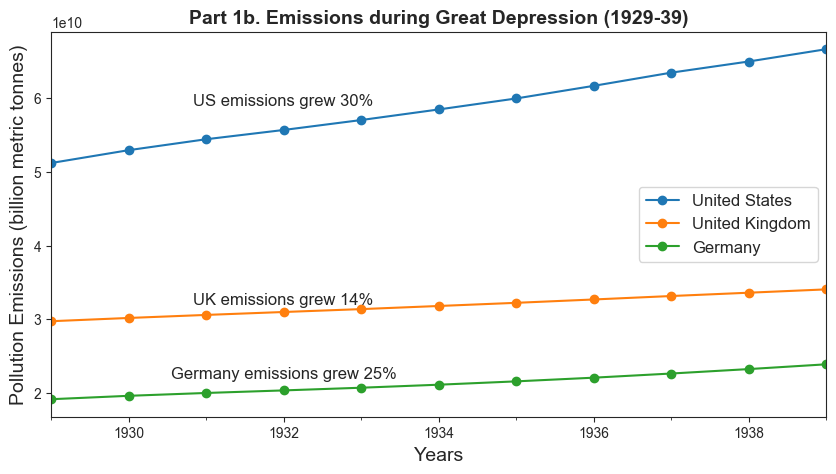

In [12]:
country_list = ['United States','United Kingdom', 'Germany']

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)
sns.set_style("ticks")
beginning_year = '1929'
end_year = '1939'
ax = plt.gca()

d_country_emission_growth = {} # calculate the emissions growth for each country
for country in country_list:
    plot_emissions(country, beginning_year, end_year).plot(ax = ax, marker='o')
    d_country_emission_growth[country] = int(round(calculate_growth_percent(country, beginning_year, end_year)))

plt.ylabel('Pollution Emissions (billion metric tonnes)', fontsize=14)
plt.ticklabel_format(axis='y', style='sci', scilimits=(10,10))
plt.xlabel('Years', fontsize=14)
plt.title("Part 1b. Emissions during Great Depression (1929-39)", fontsize=14, fontweight='bold')
plt.text('1932', 59000000000, "US emissions grew "+str(d_country_emission_growth[country_list[0]])+"%", \
         fontsize=12, horizontalalignment='center')
plt.text('1932', 32000000000, "UK emissions grew "+str(d_country_emission_growth[country_list[1]])+"%", \
         fontsize=12, horizontalalignment='center')
plt.text('1932', 22000000000, "Germany emissions grew "+str(d_country_emission_growth[country_list[2]])+"%", \
         fontsize=12, horizontalalignment='center')
ax.legend(loc='center right', facecolor='white', fontsize=12)
plt.show()

<br>

<b>United States:</b><br>
In the US the fundamental cause of the Great Depression was the decrease in spending which lead to a decline in manufacturing. Industries like construction, shipping, mining, logging, and agriculture suffered the most. Coal consumption started to decline. Between 1929 and 1933 industrial production dropped by 45% and housing construction dropped by 80% and real gross domestic product (GDP) fell 30%. By 1933 unemployment reached 25% with hundreds of thousands of Americans ending up homeless. The number of automobiles manufactured dropped by 21% during the Great Depression era.

A recovery began in the spring of 1933 where real GDP rose at an average rate of 9% per year between 1933 and 1937. In 1937–38 the United States suffered another recession which is often called 'the recession within the Depression'. Real GDP fell 10% and unemployment, which had declined considerably after 1933, hit 20%.

From 1929 to 1939 the emissions growth rate dropped to 30% which is a decrease of 32% from the previous decade. Coal and petroleum were the major sources of fuel during the 1930s.

<b>United Kingdom:</b><br>
The United Kingdom had not yet recovered fully from World War I when they were hit by the Great Depression. By 1931 unemployment had more than doubled to 20% and exports had fallen in value by 50%. North eastern towns and cities suffered almost a 70% unemployment rate as industries like shipbuilding fell by 90% due to the lack of demand for new ships. This decline in shipbuilding caused a drop in demand for coal mining and steel manufacturing. North western towns and cities known for textile manufacturing were also impacted due to the drop in demand for textiles.

The South and areas around London experienced a growth in population which led to housing construction projects. By 1936 close to 365,000 houses were built a year in the expanding suburbs of London and other cities like Brighton. Electricity was used to power these new houses, which led to manufacturing of electric goods like cookers and radios. The UK automotive industry also saw growth with the number of automobiles manufactured doubling to 2 million automobiles in the 1930s.

During the 1920s coal was a more affordable energy source for residences but during the 1930s gas prices dropped and were increasingly used in residences. By 1938, working class tenants spent 49% of fuel expenditure on coal, 23% on gas and 15% on electricity. During the 1930s UK electricity was generated from coal powered plants. UK's emission growth rate of 14% was the same in the Great Depression era as it was in the previous pre-Great Depression era. This  likely due to the decline of the shipbuilding industry but the increase in housing construction, electricity generation to power the houses along with appliances and the boom of the UK automobile industry.

<b>Germany:</b><br>
The German Republic experienced a short period of recovery and stabilization after the end of inflation in the late 1920s. The industrial sector experienced a period of rapid growth from 1927 to 1929 where Germany became the world's second industrial power behind the USA. Wages rose, as well as the standard of living but this recovery did not impact the agrarian sector and unemployment was relatively high. Nearly 2 million Germans were unemployed in 1928 and Germany's foreign debts were at 25 billion Reichsmarks.

The Great Depression hit Germany hard with American Banks cancelling loans that had been funding repayments which lead to the collapse of the Credit Anstalt in Vienna in May, 1931. This put Germany in turmoil due to the rise in violence of Nazi and communist movements. Investors withdrew their short-term money from Germany, as confidence spiralled downward. The unemployment rate reached nearly 30% in 1932 which increased support for the Nazi and communist parties. The German Republic collapsed between 1930 and 1933.

When the Nazi party took control, Hitler created a network of client states and economic allies in Latin America. Unemployment fell significantly by 1935 when Hitler cut wages, took control of labour unions and public works spending like the Autobahnen (highways). A focus on large scale military spending played a major role in the recovery.

<br><br>
### Part 1c. World War II (1939-1945)

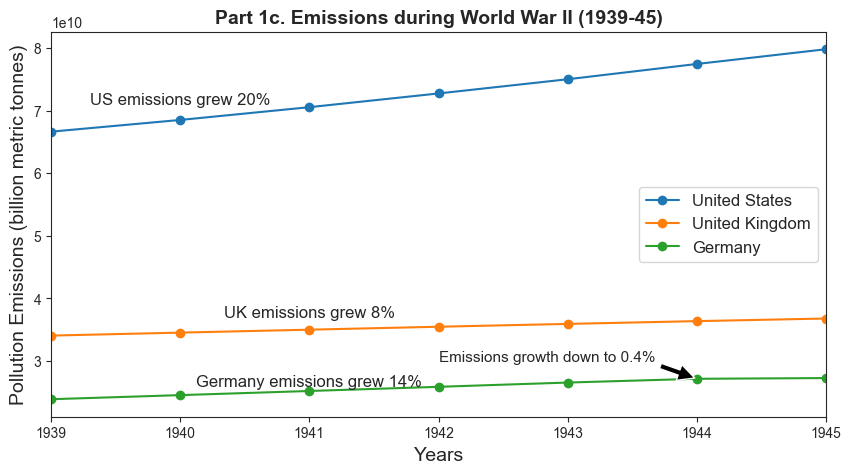

In [13]:
country_list = ['United States','United Kingdom', 'Germany']

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)
sns.set_style("ticks")
beginning_year = '1939'
end_year = '1945'
ax = plt.gca()

d_country_emission_growth = {} # calculate the emissions growth for each country
for country in country_list:
    plot_emissions(country, beginning_year, end_year).plot(ax = ax, marker='o')
    d_country_emission_growth[country] = int(round(calculate_growth_percent(country, beginning_year, end_year)))

plt.ylabel('Pollution Emissions (billion metric tonnes)', fontsize=14)
plt.ticklabel_format(axis='y', style='sci', scilimits=(10,10))
plt.xlabel('Years', fontsize=14)
plt.title("Part 1c. Emissions during World War II (1939-45)", fontsize=14, fontweight='bold')
plt.text('1940', 71000000000, "US emissions grew "+str(d_country_emission_growth[country_list[0]])+"%", \
         fontsize=12, horizontalalignment='center')
plt.text('1941', 37000000000, "UK emissions grew "+str(d_country_emission_growth[country_list[1]])+"%", \
         fontsize=12, horizontalalignment='center')
plt.text('1941', 26000000000, "Germany emissions grew "+str(d_country_emission_growth[country_list[2]])+"%", \
         fontsize=12, horizontalalignment='center')
plt.annotate('Emissions growth down to 0.4%', xy=('1944',int(emission_df.loc['Germany', '1944'])), xytext=('1942', 30000000000),xycoords='data', \
             textcoords='data', arrowprops=dict(facecolor='black', shrink=0.05), fontsize=11)
ax.legend(loc='center right', facecolor='white',fontsize=12)
plt.show()

<br>

<b>United States:</b> <br>The United States joined World War II in 1941 when the Japanese bombed Pearl Harbour. Until that point the country morale was low and unemployment hovered around 15% but the switch to a producer of war materials saw a boost to its struggling civilian economy. By 1942, automobile manufacturing came to a halt as manufacturers retooled for wartime production. Chrysler, Ford and GM manufactured airplanes, trucks, marine diesels, guns and shells. Fewer than 6,000 planes were produced in 1939 where as more than 96,000 were produced in 1944.

The construction industry too changed focus between 1939 to 1945. In 1939 there were 6,062 buildings (commercial, military and residential) completed and that number more than doubled to 13,353 in 1942.

From 1939 to 1945 coal was the major source of energy followed by petroleum. The US emissions grew 20% during this period as energy demand was mainly focused on the manufacturing of military structures, vehicles and arms.

<b>United Kingdom:</b> <br>France and Britain had warned Germany against invading Poland but Germany ignored their warning and invaded Poland in September 1939.<br>
The British Empire along with the Commonwealth was fighting the War on two fronts: in Europe and N. Africa against Germany and Italy and in Asia against Japan. With a relatively small population of 47 million Britain was limited in the war economy and armed forces. While civilian population was rationed and labour allocated to the war machine, Britain managed to produce approximately 15,000 aircraft and 22,000 tanks. This was relatively low compared to the 32,000 aircraft and 75,000 tanks produced by the US.

The lower 8% growth in emissions is likely due to the change in focus to production of aircraft, tanks and trucks instead of civilian projects. All electricity was generated by coal powered plants.

<b>Germany:</b> <br>Germany’s access to petroleum, sugar, coffee, chocolate and cotton were restricted by a British blockade at the start of the war. Germany relied on coal gasification and oil from Romania as energy sources. They also relied on the Soviet Union for supplies of grain and raw materials which they paid for with weapons and industrial machinery.

By mid 1943, Germany switched to a full war economy. This was a dramatic rise in military production with an increase in tanks and aircraft production. Close to 25,000 aircraft and 20,000 tanks were produced in 1943 compared to 15,000 aircraft and 9.000 tanks in 1942.

German factories and cities were being destroyed by allied bombings that began in 1944. Synthetic fuel, tanks and explosives production was down 86%, 35% and 42% respectively. Food was drastically scarce and close to 300,000 men were employed to repairing oil installations. This is possibly why German emissions growth slowed down to 0.4% from 1944 to 1945 where as the emissions growth for 1942-43 was 2.6% and 1943-44 was 2.3%.

During the World War II years, Germany had an overall emissions growth of 14%

<br><br>
### Part 1d. Post-World War II (1945-1955)

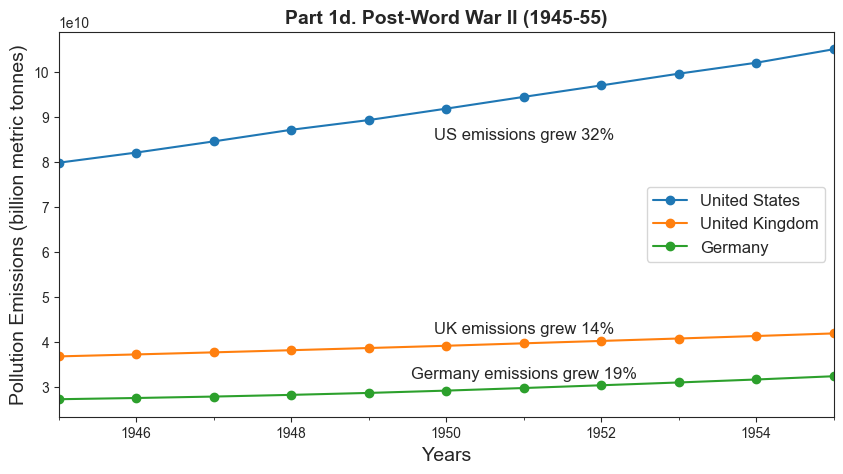

In [14]:
country_list = ['United States','United Kingdom', 'Germany']

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)
sns.set_style("ticks")
beginning_year = '1945'
end_year = '1955'
ax = plt.gca()

d_country_emission_growth = {} # calculate the emissions growth for each country
for country in country_list:
    plot_emissions(country, beginning_year, end_year).plot(ax = ax, marker='o')
    d_country_emission_growth[country] = int(round(calculate_growth_percent(country, beginning_year, end_year)))

plt.ylabel('Pollution Emissions (billion metric tonnes)', fontsize=14)
plt.ticklabel_format(axis='y', style='sci', scilimits=(10,10))
plt.xlabel('Years', fontsize=14)
plt.title("Part 1d. Post-Word War II (1945-55)", fontsize=14, fontweight='bold')
plt.text('1951', 85000000000, "US emissions grew "+str(d_country_emission_growth[country_list[0]])+"%", \
         fontsize=12, horizontalalignment='center')
plt.text('1951', 42000000000, "UK emissions grew "+str(d_country_emission_growth[country_list[1]])+"%", \
         fontsize=12, horizontalalignment='center')
plt.text('1951', 32000000000, "Germany emissions grew "+str(d_country_emission_growth[country_list[2]])+"%", \
         fontsize=12, horizontalalignment='center')
ax.legend(loc='center right', fontsize=12)
plt.show()

<br>

<b>United States:</b> <br>The Golden Age of Capitalism is the common name for the post World War II economic boom which lasted after the war ended until the early 1970s. The population growth, economic growth, rapid urbanization led to a dramatic increase in the number of cars, trucks and highways that were built.

During the late 1940s automobile production was slow as companies retooled and there was a shortage of materials but the early 1950s ushered in newer designs with larger cars and larger engines. Approximately 73.7 million cars and trucks sold during the 1950s which lead to an increased oil consumption that increased automobile pollution.

Post World War II, saw a rise in population which led to housing being constructed outside the city centre. This suburbanization construction along with the growing network of interstate highways allowed firms to follow the worker. Companies now had the option of building factories outside of the city and workers had the ability to travel from theirs homes in the suburb to the factories.

From 1945 to 1955 the emissions growth rate was 32%. Coal consumption dropped and was surpassed by oil.

<b>United Kingdom:</b> <br>England was left in ruins after being bombed for 5 years. Factories that were not destroyed had been converted to build war materials and would now need financing to convert them back to produce consumer goods. American banks provided the funds for such conversions.

Electricity was used to power homes with a boom in demand for electric gadgets like televisions and in the manufacturing of those goods. Although most households in England were unable to afford a television until the later 1950s. Personal automobiles were not common either as they were expensive.

From 1945 to 1955 the emissions growth rate was 14%. Coal was used to generate electricity.

<b>Germany:</b><br>
Germany had been heavily bombed by the allied forces during World War II and it is estimated that 70% of housing had been destroyed. In Berlin nearly 85% of industry was destroyed. Transportation was also demolished with some 10,000 locomotive engines and over 112,000 freight cars destroyed. Railroads, canals, bridges and the entire merchant fleet was destroyed. The allies split Germany into four zones: Great Britain in the northwest, France in the southwest, the United States in the south and the Soviet Union in the east.

The final agreements of the Potsdam Conference in 1945 included the decentralization, demilitarization, denazification and democratization of Germany. Germany's pre-war heavy-industry economy was to be converted to agriculture and light domestic industry. In 1948 the European Recovery Program (Marshall Plan) was signed into law by the US. Aid was originally offered to almost all the European countries, including those under military occupation by the Soviet Union. The Allies forbid production of munitions, ships or aircraft, as well as any production of strategic metals and chemicals was strictly controlled.

West Germany did not have a national government until 1949 which meant there was no national capital instructing cities how to rebuild for the first four years after the war. The city planners met with local residents and displayed their city plans. Some were approved some were forced to modify. Local governments used a large number of women and members of the Nazi Party to clear the rubble. There was a prompt restoration of agriculture, transport, utilities and housing to meet the needs of the occupying allied forces, refugees and German people. Then economic minister Ludwig Erhard had a laissez-faire approach to business and industry. This allowed a free and competitive marketplace without cartels or government regulations.

West Germany's "Economic Miracle" was a result of the factors above as well as recognition of workers' rights. By 1949 the overall industrial production stood at about 90% of the 1936 level and by 1953 it was at about 158% of the 1936 level. Due to the prohibition from rearmament, West Germany produced consumer, export and industrial goods for European nations. When the Korean war began in 1950, some nations converted some of their industry into military industry. This was a massive boost in the demand for German goods and by 1955 West Germany was the world's third largest industrial economy.

Germany used oil, synthetic oil and lignite (brown coal) as a source of fuel. Considering the rebuild, and focus on consumer and industrial goods manufacturing we can see how Germany's emissions grew to 19% post World War II from 1945 to 1955.

<br>

### Part 1e. Emissions Growth Rate per Period by Country

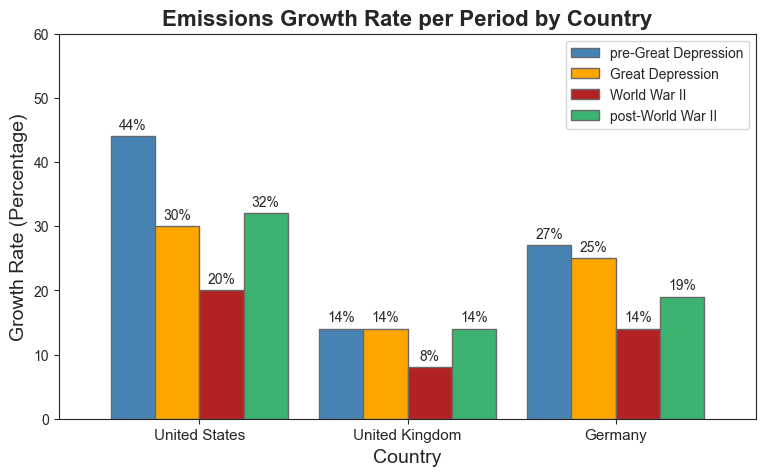

In [15]:
# plot the chart for emission growth comparison
country_growth_df = create_country_growth_df(country_list)
%matplotlib inline
plt.rcParams["figure.figsize"] = (9,5)
sns.set_style("ticks")

x_val = 'country'
y_list = ['pre-Great Depression', 'Great Depression','World War II','post-World War II']
ax = country_growth_df.plot(x=x_val, y=y_list,
                      kind='bar', stacked=False, color=['steelblue','orange','firebrick','mediumseagreen'],
                      width=0.85, edgecolor='dimgray')

plt.ylim(0,60)
plt.xticks(rotation=0, fontsize=11)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Growth Rate (Percentage)', fontsize=14)
plt.title("Emissions Growth Rate per Period by Country", fontsize=16, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='{:.0f}%')
    
plt.show()

<br>

From the 'Emissions Growth Rate by Country per Period' chart above we observe that for each country during the four time periods is that rate of emissions decreased from pre-Great Depression through to World War II but then increased post-World War II. This is in line with our analysis and findings that there were large construction projects along with people celebrating life during the pre-Great Depression period. This construction and lifestyle slowed down during the Great Depression and eventually was refocused to the war machine during World War II. We observe that the emissions level increased post-World War II as the countries focused on rebuilding all that was destroyed.

Based on my research into the history of the US, UK and Germany from the 1920s to 1955 we can conclude that the burning of fossil fuels were the source of these emissions. Coal, petroleum, oil and coal based synthetic fuels were used to generate electricity, power industry and manufacturing. This included construction of housing, commercial buildings, roads, highways and railroads. Powering of automobiles and eventually war machines as well.

Coal was the primary source of energy for all three nations from periods of pre-Great Depression through to World War II. Coal was eventually replaced by oil in the United States after World War II. Germany used coal gasification and oil during World War II.

<br>

## Part 2

### India (1980 - 2017)

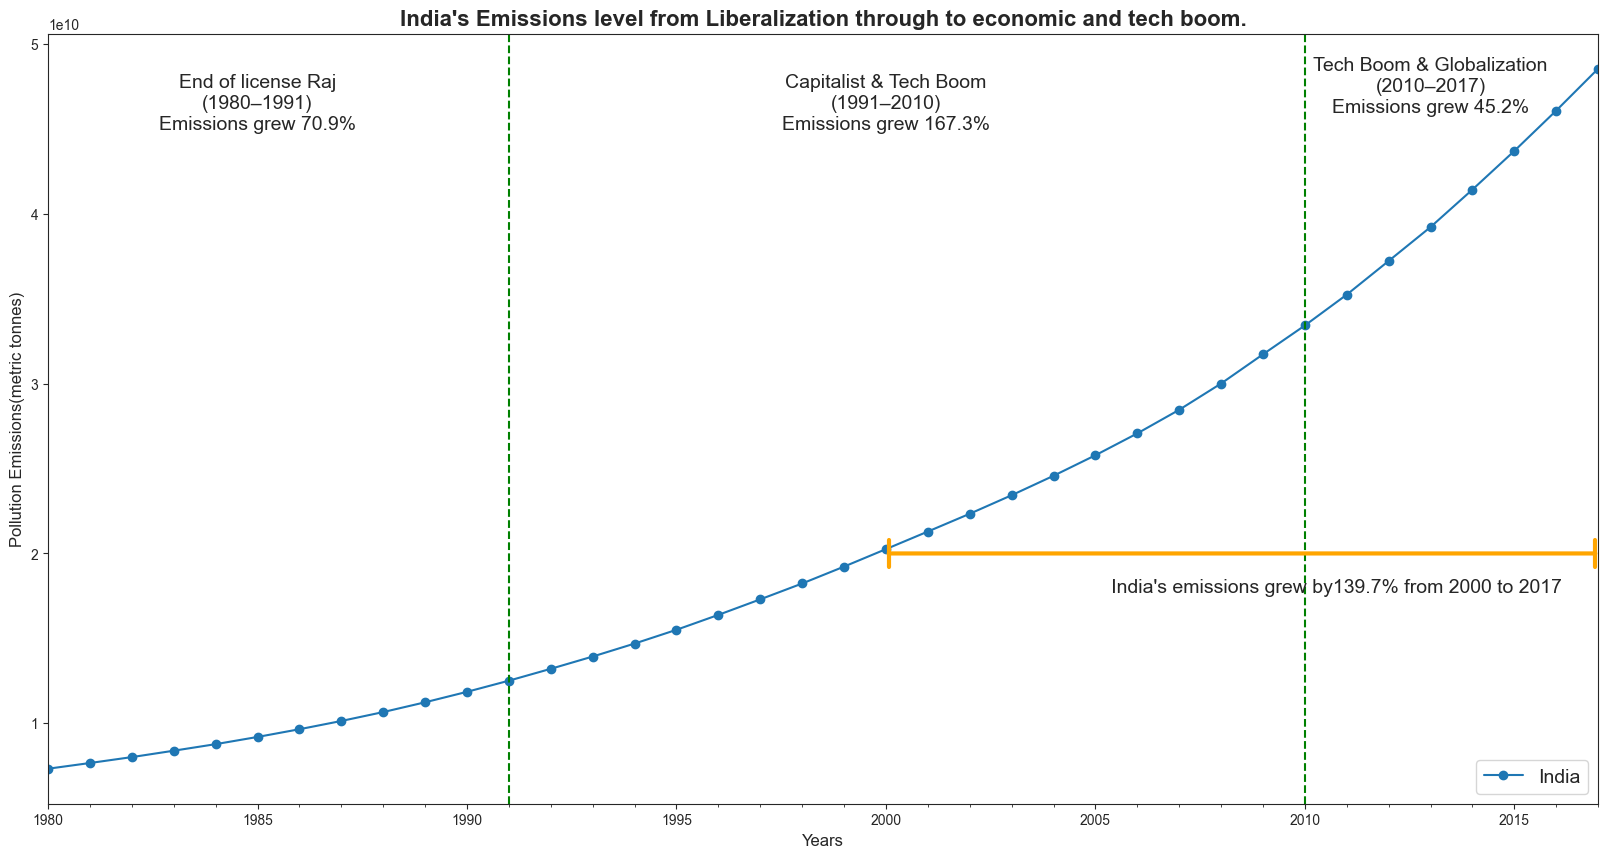

In [16]:
country_list = ['India']

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
sns.set_style("ticks")
beginning_year = '1980'
end_year = '2017'
ax = plt.gca()

for country in country_list:
    plot_emissions(country, beginning_year, end_year).plot(ax = ax,marker='o')

#indtxt = "1980s: Selective Reform"
eb = calculate_growth_percent(country_list[0], '1980', '1991')
# print(eb)
eb_txt = "End of license Raj\n(1980–1991)\nEmissions grew "+str(eb)+"%"
# print(eb_txt)
cb = calculate_growth_percent(country_list[0], '1991', '2010')
# print(cb)
cb_txt = "Capitalist & Tech Boom\n(1991–2010)\nEmissions grew "+str(cb)+"%"
eb2 = calculate_growth_percent(country_list[0], '2010', '2017')
# print(eb2)
eb2_txt = "Tech Boom & Globalization\n(2010–2017)\nEmissions grew "+str(eb2)+"%"
plt.ylabel('Pollution Emissions(metric tonnes)', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.title("India's Emissions level from Liberalization through to economic and tech boom.", fontsize=16, fontweight='bold')
plt.axvline('1991', color='green', linestyle = '--')
plt.text('1985', 45000000000, eb_txt, fontsize=14, horizontalalignment='center')
plt.axvline('2010', color='green', linestyle = '--')
plt.text('2000', 45000000000, cb_txt, fontsize=14, horizontalalignment='center')
plt.text('2013', 46000000000, eb2_txt, fontsize=14, horizontalalignment='center')
twth_sv = calculate_growth_percent(country_list[0], '2000', '2017')
# print(twth_sv)
plt.annotate('', xy=('2000', 20000000000), xytext=('2017', 20000000000), xycoords='data', textcoords='data',\
            arrowprops=dict(arrowstyle= '|-|', color="orange", linewidth=3))
plt.annotate("   India's emissions grew by"+str(twth_sv)+"% from 2000 to 2017", xy=('2005', 18000000000), ha='left', va='center', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
#plt.text(11, 45000000000, indtxt, fontsize=12)
plt.show()

<b>India</b>

1980-1991:<br>
In 1980 India reelected Indira Gandhi as Prime Minister and she initiated a five year plan to boost economic competitiveness. This included the removal of price controls, initiation of fiscal reforms, a revamp of the public sector, reductions in import duties, and de-licensing of the domestic industry. This was the end of the license Raj that began in 1956 with the development of the public sector. An example of this is in 1983 the governement rolled out a car called the Maruti 800, which was regarded as the "people's car". It was a joint venture with Suzuki Japan. With fuel efficiency and an affordable price tag the Maruti 800 was a success. This success led to the manufacturing of other automobile models like the Omni minivan in 1984 and India’s iconic off-roader Gypsy in the year 1985. Prior to the Maruti 800, India manufactured two car models (one based on a 1950s Fiat model and another on a post-war Morris Oxford) that were only affordable by the upper classes.

Indira Gandhi's son Rajiv Gandhi became Prime Minister of India after his mother's assassination in 1984. His 1985-86 budget lowered direct taxes for companies and raised exemption limits for income tax. He is widely credited for ushering in the information technology and telecom revolutions in the country.

During the 1980s, India's GDP grew by 45% from USD 186 billion in 1980 to USD 270 billion in 1991.
Coal and hydro were the main sources of energy through the 1980s with coal usage almost doubling hydro by 1990.

1991-2010:<br>
In 1991 then finance minister Manmohan Singh initiated the economic liberalisation of India.  The reforms did away with the Licence Raj, reduced tariffs and interest rates and ended many public monopolies, allowing automatic approval of foreign direct investment in many sectors. These reforms removed the public sector monopoly of various industries and launched a policy of automatic approval for up to 51% of direct foreign investment.

During the 90s, India saw a growth in automobiles, IT and telecommunications. International automobile companies like Ford, GM, Honda, Hyundai and Mercedes setup manufacturing plants. With the availability and expansion of Internet connectivity and mobile networks, India saw a growth in technology demand and adoption.

By 2000 India's GDP was USD 468 billion which was a 73% increase from 1991. This growth in the 90s was almost half of the growth in the 80s but the 2000s saw a growth of 259% to USD 1.68 trillion. As Internet connectivity continued to improve, India became a global hub for call centres and other outsourcing and offshoring services. This involved construction of new office facilities to host the call centres and offshoring staff and equipment. With the introduction of 3G the mobile networks began to expand and competition between telecommunication providers increased. The Indian economy became more integrated with the global economy, leading to increased foreign investment and partnerships.

2010-2017:<br>
India has the third largest number of vehicles in the world. In 2013 it was estimated that there were 120 million cars registered but with a population of approximately 1.2 billion that year, it gives us a ratio of around 18 cars per thousand people. From 2005 to 2014 the number of vehicles (commercial and personal) in use grew by 171%. When breaking down the growth between commercial and personal vehicles we find that commercial vehicles grew by 123% where as personal vehicles almost doubled at 188%. This large growth in vehicle use is a likely contributor to the rise in emissions we observe in the chart above.

Manufacturing and construction industries related to the production of cement require large amounts of energy. This energy is provided largely by coal burning power plants. India was traditionally an agricultural economy but the growth in industrialization has increased energy demands while farming villages have been converted to industrial towns. By 2014 India was second (after China and ahead of the US) in CO2 emissions from the manufacturing and construction industries.

India's economic growth which saw the GDP rise from USD 186 billion in 1980 to USD 2.65 trillion by 2017 involved large scale construction and manufacturing projects as well as a growth in personal automobile use. This growth fuelled the reliance on coal and oil for energy which directly contributes to India's emission growth of 564% from 1980 to 2017. 

India is the world's second largest consumer of coal after China. Coal has fuelled the rapid growth in Indian electricity use and its coal fleet has more than tripled in size since 2000. In 2017, coal generated 76% of India’s electricity and emissions growth was at 139.7% from 2000 to 2017. India's grid-connected coal (and lignite) power stations' capacity reached almost 200GW in 2017, more than doubling since 2007. 

<br>

## Part 3

### China & United States of America (1980 - 2017 historical; 2017 - 2047 forcasted)

/home/brendan/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/home/brendan/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


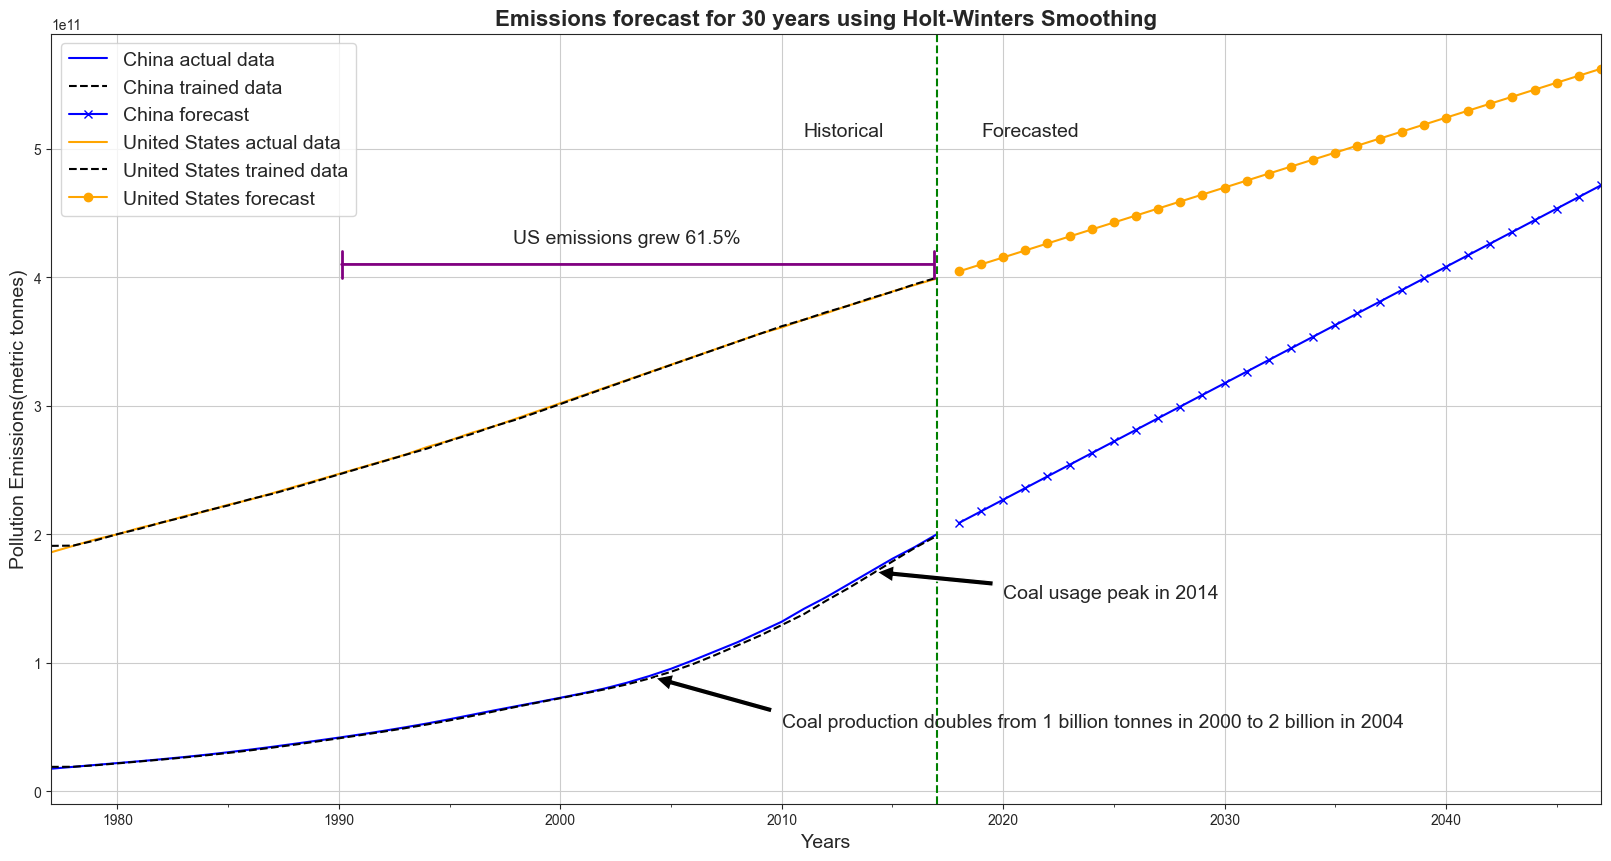

In [17]:
country_forecast_list = ['China', 'United States']


# %pylab inline
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
sns.set_style("ticks")
lcolor = 'blue'
lmarker = 'x'

for country_fcast in country_forecast_list:
    historical_data = get_historical_data(country_fcast)
    fitted_data = get_fitted_data(historical_data)
    forecast_data = get_forecast_data(fitted_data)
    historical_data.plot(color = lcolor, label= country_fcast+' actual data')
    fitted_data.fittedvalues.plot(color = 'black', linestyle= 'dashed', label= country_fcast+' trained data')
    forecast_data.plot(color = lcolor, marker = lmarker, label= country_fcast+' forecast')
    lcolor = 'orange'
    lmarker = 'o'

ch_coal_pk = emission_df.loc['China','2014']
ch_coal_dbl = emission_df.loc['China','2004']
us_rec_drp = emission_df.loc['United States','2008']

plt.title("Emissions forecast for 30 years using Holt-Winters Smoothing", fontsize=16, fontweight='bold')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Pollution Emissions(metric tonnes)', fontsize=14)
plt.text('2019', 510000000000, "Forecasted", fontsize=14)
plt.text('2011', 510000000000, "Historical", fontsize=14)
plt.annotate('Coal usage peak in 2014', xy=('2014', ch_coal_pk), xytext=('2020', 150000000000),xycoords='data', \
             textcoords='data', arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)
plt.annotate('Coal production doubles from 1 billion tonnes in 2000 to 2 billion in 2004', xy=('2004', ch_coal_dbl),\
             xytext=('2010', 50000000000),xycoords='data', textcoords='data', arrowprops=dict(facecolor='black', shrink=0.05)\
            , fontsize=14)
plt.annotate('', xy=('1990', 410000000000), xytext=('2017', 410000000000), xycoords='data', textcoords='data',\
            arrowprops=dict(arrowstyle= '|-|', color='purple', linewidth=2))
plt.annotate('US emissions grew 61.5%', xy=('2003', 430000000000), ha='center', va='center', fontsize=14)
#plt.annotate('Emissions dropped due to recession in 2008', xy=('2008', us_rec_drp), xytext=('2012', 320000000000),xycoords='data', \
#             textcoords='data', arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.axvline('2017', color='green', linestyle = '--')
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.show()

<b>China</b><br>
China's level of emissions in 2017 is the same as the US' emissions in 1980. From 1995 to 2005, China's emissions grew by 70% and from 2005 to 2015 it grew by 89.8%. Probably due to China's massive manufacturing based economy that has lead to larger energy consumption. Coal remains the foundation of the Chinese energy system, covering close to 70% of the country's primary energy needs and representing 80% of the fuel used in electricity generation. China's emissions grew by 29.5% from 2010 to 2014 which is when it's coal consumption peaked (per analysis in 2016). The emissions then grew by 17% from 2014 to 2017 which is almost half the growth rate during 2010 to 2014.

China is also the worlds largest renewable energy producer, with a capacity of 152 GW. The major renewable energy source in China is hydro-power followed by wind and solar. As China is working to increase their reliance on renewable energy over fossil fuel (in accordance to the 2016 Paris Agreement), they have committed to make non-fossil fuel energy 20% of their energy supply by 2030. China's progress indicates that their total carbon emissions will fall by 2025 which is ahead of their 2030 target date.

Assuming the trend stays the same China will surpass the US in 70 years on emissions. Considering that China is adhering to the Paris Agreement we can hope to see their emission growth gradually decrease.

The largest source of emissions in 2017 was transportation at 29%, followed by electricity generation at 28% and industry at 22%.

<b>United States of America</b><br>
Unites States’ emissions growth of 15.9% from 2000 to 2008 but growth dropped to 14% from 2008 to 2017. This drop in emissions is due to the 2008 recession which lead to the economic slowdown and a shift from coal to cleaner-burning natural gas to produce electricity as the price of natural gas had declined. Another factor contributing to the drop in emissions during 2008 to 2017 is the market share of electric passenger cars. By 2011 there were 0.14% electric cars which rose to 1.13% in 2017.

United States' transportation emissions are a result of combusting of petroleum-based products like gasoline. Passenger cars and light-duty trucks, SUVs, pickup trucks and minivans account for over half of the emissions form the transportation sector. Emissions from freight trucks, commercial aircraft, ships, boats and trains account for the rest of the transportation sector.

From 1990 to 2017 total transportation emissions grew by 61.5% due to the increased demand for travel as the number of cars and light-duty trucks increased by 45.9%. This demand was due to population growth, economic growth, urban sprawl and periods of low fuel prices.

Electricity generation accounted for 28% of emissions which is largely due to 67.9% of emissions from coal power plants. Coal combustion is more carbon intensive than burning natural gas or petroleum for electricity. In the United States 31.2% of electricity is generated by coal combustion, 31.2% from natural gas, 21% nuclear and 16.2 from renewable sources like hydroelectricity, biomass, wind and solar.

<br>

## References

### Part 1

* https://www.wri.org/blog/2014/05/history-carbon-dioxide-emissions
* https://www.widewalls.ch/1920s-architecture/
* https://geology.com/articles/history-of-energy-use/
* https://www.mdpi.com/1996-1073/7/12/7955/pdf
* https://www.cambridge.org/core/journals/historical-journal/article/evolution-of-energy-demand-in-britain-politics-daily-life-and-public-housing-1920s1970s/C60106A45CBD0E469EE46CF8192E6F37
* https://www.planete-energies.com/en/medias/saga-energies/history-energy-united-kingdom
* https://en.wikipedia.org/wiki/Great_Depression#United_Kingdom
* https://www.historic-uk.com/HistoryUK/HistoryofBritain/The-1920s-in-Britain/
* http://euanmearns.com/uk-electricity-generation-statistics-1920-2012/
* http://marcuse.faculty.history.ucsb.edu/classes/33d/projects/1920s/Econ20s.htm
* https://www.planete-energies.com/en/medias/saga-energies/history-energy-germany
* https://en.wikipedia.org/wiki/History_of_rail_transport_in_Germany#Deutsche_Reichsbahn_(1920%E2%80%931945)
* https://www.sciencedirect.com/science/article/abs/pii/037877539280059K
* https://www.americanmachinist.com/archive/features/article/21896269/1940s
* http://www.sjsu.edu/faculty/watkins/eggli.htm
* https://fraser.stlouisfed.org/files/docs/publications/bls/bls_0915_1948.pdf
* http://www.british-history.co.uk/ww2-economy.html
* https://en.wikipedia.org/wiki/Economy_of_Nazi_Germany#Wartime_policies:_1939%E2%80%931945
* https://www.epa.gov/transportation-air-pollution-and-climate-change/accomplishments-and-success-air-pollution-transportation
* https://en.wikipedia.org/wiki/American_automobile_industry_in_the_1950
* https://en.wikipedia.org/wiki/Automotive_industry_in_the_United_States
* https://scholar.princeton.edu/sites/default/files/lboustan/files/research21_urban_handbook.pdf
* https://www.historyofengland.net/world-war-ii
* https://www.historyofengland.net/modern-general-history/english-society-and-values-over-the-last-75-years
* https://www.theguardian.com/world/2009/sep/11/second-world-war-rebuilding
* https://europe.unc.edu/the-end-of-wwii-and-the-division-of-europe/
* https://www.thealeppoproject.com/how-did-germany-rebuild-after-world-war-ii/
* Wende, P. (2005). A History of Germany. Palgrave Macmillan
* Turk, E. L. (1999). The History of Germany. Greenwood Press
* https://www.britannica.com/event/Marshall-Plan
* Fulbrook, M. (2019). A Concise History of Germany (3rd edition). Cambridge University Press
* https://www.transport-museum.com/visiting/the-growth-of-the-motor-industry-1918-to-1939.aspx
* https://en.wikipedia.org/wiki/U.S._Automobile_Production_Figures
* https://americainclass.org/sources/becomingmodern/modernity/text5/colcommentarysky.pdf
* https://en.wikipedia.org/wiki/Early_skyscrapers
* https://cepr.org/voxeu/columns/what-caused-recession-1937-38
* https://www.federalreservehistory.org/essays/recession-of-1937-38
* https://www.eia.gov/todayinenergy/detail.php?id=11951

### Part 2

* https://www.carbonbrief.org/the-carbon-brief-profile-india
* https://www.carbonbrief.org/guest-post-why-indias-co2-emissions-grew-strongly-in-2017/
* https://en.wikipedia.org/wiki/Economic_liberalisation_in_India
* https://www.asianstudies.org/publications/eaa/archives/the-history-of-economic-development-in-india-since-independence/
* https://www.imf.org/external/pubs/ft/wp/2004/wp0443.pdf
* https://www.researchgate.net/publication/323074098
* https://en.wikipedia.org/wiki/Electricity_sector_in_India
* https://www.livemint.com/news/india/a-short-history-of-indian-economy-1947-2019-tryst-with-destiny-other-stories-1565801528109.html
* https://niti.gov.in/writereaddata/files/Energising-India.pdf
* Guemez Ricalde, Francisco J., Dr., 2018, ENVIRONMENTAL COST OF ECONOMIC GROWTH IN INDIA, PARIPEX - INDIAN JOURNAL OF RESEARCH, Volume-7, Issue-2
* https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2017&locations=IN&start=1980
* https://www.financialexpress.com/auto/car-news/this-day-in-history-birth-of-iconic-maruti-800-rs-47000-peoples-car-scripted-indias-ace-carmakers-success-esteem-alto-vitara-brezza-gypsy-journey-indira-gandhi/2149691/
* https://www.overdrive.in/news-cars-auto/features/35-years-of-the-maruti-800-a-social-icon/
* https://link.springer.com/chapter/10.1007/978-981-13-8102-7_19

### Part 3

* https://en.wikipedia.org/wiki/Energy_policy_of_China
* https://chinapower.csis.org/energy-footprint/
* https://www.theguardian.com/environment/2016/jul/25/china-coal-peak-hailed-turning-point-climate-change-battle
* https://en.wikipedia.org/wiki/Coal_in_China#Coal_consumption
* https://www.nature.com/articles/sdata2017201/
* https://en.wikipedia.org/wiki/Greenhouse_gas_emissions_by_the_United_States
* https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions
* https://www.nytimes.com/2011/02/17/science/earth/17emit.html
* https://en.wikipedia.org/wiki/Plug-in_electric_vehicles_in_the_United_States#Markets_and_sales